# 5. Condicionais e Recursões

O assunto principal deste capítulo é a instrução `if`, que executa código diferente dependendo do estado do programa. Antes de discutirmos a instrução `if`, no entanto, quero introduzir os operadores *divisão inteira* e *módulo*.

## O Piso de Uma Divisão e Módulos

O operador de divisão inteira, representado pelo símbolo `÷`, pode ser obtido digitando `\div` e pressionando a tecla `TAB`. Você também pode usar o operador de divisão inteira através de uma chamada à função `div`. Esse operador divide dois números e fica apenas com a parte inteira. Por exemplo, se a duração de um filme é de 105 minutos, qual a sua duração em horas? Normalmente, uma divisão produzirá um número de ponto flutuante:

In [1]:
minutos = 105

105

In [2]:
minutos / 60

1.75

No entanto, não costumamos escrever horas com casas decimais. A divisão inteira produzirá um número de horas inteiro, descartando a parte decimal do resultado anterior:

In [3]:
horas = minutos ÷ 60

1

In [4]:
horas = div(minutos, 60)

1

Para calcular o resto de uma divisão inteira, você pode subtrair da variável `minutos` o resultado da divisão inteira, armazenado na variável `horas`, vezes o *divisor* da divisão inteira:

In [5]:
resto = minutos - horas * 60

45

Outra forma de fazer isso é utilizar o operador *módulo*, representado pelo símbolo `%`, que produz o *resto* da divisão inteira de dois números:

In [6]:
resto = minutos % 60

45

> *Dica*: O operador de módulo é muito útil. Você pode, por exemplo, verificar se `x` é divisível por `y` calculando `x % y`. Se o *resto da divisão inteira* de `x` por `y` for zero, então `x` será divisível por `y`.
>
> Você também pode usar o operador de módulo para extrair o último dígito de um número. Por exemplo, calcular `x % 10` resulta no último dígito de um inteiro `x` em base 10. Da mesma forma, calcular `x % 100` produz os dois últimos dígitos de um número em base 10. Veja os exemplos nas células abaixo:

In [7]:
y = 3
x = 3 * 5 # x é divisível por y

x % y

0

In [8]:
x = 123

x % 10

3

In [9]:
x = 123

x % 100

23

## Expressões Booleanas

Uma *expressão booleana* é um tipo de expressão que pode ser *verdadeira*, produzindo o valor `true`, ou *falsa*, produzindo o valor `false`. Os exemplos abaixo utilizam o operador de *comparação*, representado pelo símbolo `==`, que compara dois valores e produz `true`, se eles forem iguais, ou `false` caso contrário:

In [10]:
5 == 5

true

In [11]:
5 == 6

false

Os valores `true` e `false` são especiais, e são de tipo `Bool`. Eles não são strings:

In [12]:
typeof(true)

Bool

In [13]:
typeof(false)

Bool

O operador `==` é um *operador relacional*, ou *operador de comparação*. Em Julia, os operadores de comparação são:

| Operador | Nome | Pergunta |
| --- | --- | --- |
| `x == y` | igualdade | `x` é igual a `y`? |
| `x != y` (ou `x ≠ y`, com `\ne` + `TAB`) | não-igual, ou diferente | `x` é diferente de `y`? |
| `x > y` | maior-que | `x` é maior que `y`? |
| `x < y` | menor-que |`x` é menor que `y`? |
| `x >= y` (ou `x ≥ y`, com `\ge` + `TAB`) | maior-ou-igual | `x` é maior ou igual a `y`? |
| `x <= y` (ou `x ≤ y`, com `\le` + `TAB`) | menor-ou-igual | `x` é menor ou igual a `y`? |

> *Aviso*: Esses operadores podem parecer familiares, mas o significado dos símbolos em Julia é diferente de seu significado matemático. Um erro comum é utilizar o operador de *atribuição*, representado pelo símbolo `=`, numa comparação onde deveria ser utilizado o operador de *igualdade*, representado pelo símbolo `==`. Lembre-se também que os símbolos `=>` e `=<` não são operadores válidos em Julia.

## Operadores Lógicos

Os três *operadores lógicos* são o operador _e_, representado pelo símbolo `&&`, o operador *ou*, representado por `||`, e o operador *não*, ou *negação*, representado pelo símbolo `!`. Esses operadores possuem *semântica*, ou significado, similar em Julia e em português.

Por exemplo, a avaliação da expressão `x > 0 && x < 10` resulta no valor `true`, ou verdadeiro, se `x` for maior que `0` _e_ menor que `10`. Dizemos que uma expressão *é verdadeira* se sua avaliação resulta no valor `true`, e falsa se sua avaliação resulta no valor `false`.

In [14]:
x = 2.5

x > 0 && x < 10

true

In [15]:
x = 0

x > 0 && x < 10

false

A expressão `n % 2 == 0 || n % 3 == 0` é verdadeira se *uma*, ou *ambas*, de suas as condições forem verdadeiras, isto é, se o número `n` é divisível por `2` *ou* por `3`:

In [16]:
n = 4

n % 2 == 0 || n % 3 == 0

true

In [17]:
n = 9

n % 2 == 0 || n % 3 == 0

true

In [18]:
n = 5

n % 2 == 0 || n % 3 == 0

false

Os operadores `&&` e `||` são [*associativos-à-direita*](https://pt.wikipedia.org/wiki/Associatividade_de_operadores), isto é, a expressão abaixo é verdadeira, independentemente dos valores de `a` e `b`:

In [19]:
a = b = c = true

(a || b && c) == (a || (b && c))

true

No entanto, o operador`&&` tem mais prioridade que o operador `||`, isto é, a expressão abaixo é falsa:

In [20]:
a = b = false
c = true

(a && b || c) == (a && (b || c))

false

O operador `!` nega uma expressão booleana. Assim, as expressões abaixo são verdadeiras:

In [21]:
x = 20
y = 30

x < y

true

In [22]:
!(x > y)

true

## Execução Condicional

Para escrever um programa útil, é quase sempre necessário modificiar seu comportamento de acordo com o *estado* de determinadas *condições*. *Execuções condicionais* permitem fazer essas modificações. A forma mais simples de execução condicional é a instrução `if`:

In [23]:
x = 2

if x > 0
    println("x é positivo")
end

x é positivo


A expressão booleana que aparece depois da instrução `if` é chamada de *condição*. Se a expressão for verdadeira, as instruções indentadas serão executadas. Caso contrário, nada acontecerá.

A instrução `if` tem a mesma estrutura das definições de funções, que vimos no capítulo Funções. Ela começa com um cabeçalho, seguido de um corpo, e termina com a palava-chave `end`. Instruções como essa são chamadas de *instruções compostas*.

Como na definição de funções, não há limite para a quantidade de instruções que pode aparecer no corpo de uma instrução condicional. Às vezes, pode ser útil escrever uma instrução condicional com corpo vazio, como uma marcação de que ainda falta escrever código para tratar determinadas condições. Você pode deixar um `println`, ou um comentário, para ressaltar que ainda falta escrever algo:

In [24]:
x = -1

if x < 0
    println("Ainda não trato números negativos")
end

Ainda não trato números negativos


## Execução Alternativa

Uma segunda forma na qual podemos escrever a instrução condicional `if` é a *execução alternativa*. Nesse caso, o fluxo de execução pode seguir *dois caminhos*, e o valor da condição determinará o caminho seguido. A sintaxe dessa forma de instrução condicional é a seguinte:

In [25]:
x = 3

if x % 2 == 0
    println("x é par")
else
    println("x é impar")
end

x é impar


Sabemos que `x` é par se o resto da divisão de `x`por `2` for `0`, e nosso código acima exibirá uma mensagem apropriada. Se a condição for falsa, no entanto, o segundo conjunto de instruções será executado. Dado que a condição será *necessariamente* verdadeira *ou* falsa, apenas uma das alternativas será executada. As alternativas são chamadas de *ramos*, ou *branches* em inglês, pois *ramificam* o fluxo de execução.

## Expressões Condicionais Encadeadas

Às vezes temos mais de duas possibilidades, e precisamos de mais de dois ramos de execução. Podemos expressar uma situação como essa usando uma *expressão condicional encadeada*:

In [26]:
x = 10
y = 5

if x < y
    println("x é menor que y")
elseif x > y
    println("x é maior que y")
else
    println("x é igual a y")
end

x é maior que y


Na expressão acima, somente um ramo será executado. Não há limite para a quantidade de instruções `elseif` encadeadas, isto é, você pode criar quantos ramos de execução precisar. Se houver uma instrução, ou *cláusula*, `else`, ela deve estar no final da expressão condicional encadeada. No entanto, não é necessário incluir uma cláusula `else`:

In [27]:
escolha = "b"

if escolha == "a"
    println("a escolha foi a")
elseif escolha == "b"        
    println("a escolha foi b")
elseif escolha == "c"        
    println("a escolha foi c")
end

a escolha foi b


Numa expressão condicional encadeada, as condições são verificadas em ordem. Se a primeira condição for falsa, então a segunda será verificada, e assim por diante. Se uma das condições for verdadeira, o ramo correspondente executará suas instruções e a execução condicional encadeada se encerrará. Caso mais de uma condição seja verdadeira, apenas o primeiro ramo com condição verdadeira encontrado será executado.

## Expressões Condicionais Aninhadas

Condições podem ser colocadas dentro de outras, isto é, condições podem ser *aninhadas*. Podemos reescrever um dos exemplos anteriores usando expressões *condicionais aninhadas*:

In [28]:
x = 10
y = 20

if x == y
    println("x é igual a y")
else
    if x < y
        println("x é menor que y")
    else
        println("x é maior que y")
    end
end

x é menor que y


A condição mais exterior possui dois ramos. O primeiro ramo contém uma instrução simples. O segundo ramo contém outra instrução `if` que cria, por sua vez, dois outros ramos. Esses novos ramos consistem de instruções simples, mas também poderiam ser instruções condicionais.

Mesmo usando indentação de código para ressaltar a estrutura de expressões condicionais, expressões aninhadas tornam-se difíceis de ler conforme adicionamos mais ramos. Evitar condicionais aninhadas quando for possível é, portanto, uma ótima ideia.

Operadores lógicos podem ser usados para simplificar expressões condicionais aninhadas. Considere o exemplo abaixo:

In [29]:
x = 2

if 0 < x
    if x < 10
        println("x é um número positivo de um dígito")
    end
end

x é um número positivo de um dígito


A instrução `println` executa apenas se *passarmos* pelas duas condições, isto é, se forem ambas verdadeiras.
Assim, podemos reescrever esse exemplo usando o operador `&&` e uma única expressão condicional:

In [30]:
x = 2

if 0 < x && x < 10
    println("x é um número positivo de um dígito")
end

x é um número positivo de um dígito


Em Julia, podemos escrever essa expressão de uma forma mais concisa, similar à forma como escrevemos em notação matemática:

In [31]:
x = 2

if 0 < x < 10
    println("x é um número positivo de um dígito")
end

x é um número positivo de um dígito


## Recursão

Assim como uma função pode chamar outras funções, uma função também pode chamar a si mesma. Pode não ser óbvio à primeira vista por que isso pode ser interessante, mas essa propriedade simples é uma das coisas mais mágicas que um programa pode fazer.

Por exemplo, considere a seguinte função:

In [32]:
function contagem_regressiva(n)
    if n ≤ 0
        println("Decolar!")
    else
        print(n, " ")
        contagem_regressiva(n - 1)
    end
end

contagem_regressiva(3)

3 2 1 Decolar!


Se `n` for `0`, ou negativo, a saída será `"Decolar!"`. Caso contrário, a função imprime o número `n` e chama a função `contagem_regressiva`, isto é, ela mesma, passando o número `n - 1` como argumento.

O que aconteceu quando chamamos a função `contagem_regressiva` na célula anterior? Vamos ver:

1. A execução começa com `n == 3` e, como `n > 0`, a função imprime `3` e chama a si mesma com `n - 1`...
    1. A execução começa com `n == 2` e, como `n > 0`, a função imprime `2` e chama a si mesma com `n - 1`...
        1. A execução começa com `n == 1` e, como `n > 0`, a função imprime `1` e chama a si mesma com `n - 1`...
            1. A execução começa com `n == 0` e, como `n <= 0`, a função imprime `"Decolar!"` e termina.
        2. A função que recebeu `n == 1` termina.
    2. A função que recebeu `n == 2` termina.
2. A função que recebeu `n == 3` termina.
3. E agora estamos de volta à função `main`.

Uma função que chama a si mesma é chamada de *função recursiva*, e o processo que uma função recursiva segue quando é executada é chamado de *recursão*.

A célula abaixo apresenta um outro exemplo de recursão, definindo uma função que imprime uma string `n` vezes:

In [33]:
function imprime_n(s, n)
    if n ≤ 0
        return
    end
    
    println(s)
    
    imprime_n(s, n - 1)
end

imprime_n("Recursão!", 5)

Recursão!
Recursão!
Recursão!
Recursão!
Recursão!


No exemplo acima, a instrução `return` interrompe a função quando `n <= 0`. Nesse caso, o fluxo de execução volta para o chamador, e o resto da função não é executado.

O resto da função é parecido com a função `contagem_regressiva`. A função imprime `s` e chama a si mesma para imprimir `s` mais `n - 1` vezes. O número total de linhas impressas será `1 + (n - 1)`, isto é, `n`.

Em exemplos simples como esse, é mais fácil usar um laço `for`. Mais tarde, veremos exemplos difíceis de escrever usando laços `for`, porém fáceis de escrever usando recursão. Por isso, é bom começarmos cedo a estudar recursão.

## Diagramas de Pilha para Funções Recursivas

Vimos que os diagramas de pilha podem ser usados para descrever o estado de um programa durante uma chamada de função, e veremos agora que eles também podem nos ajudar a interpretar funções recursivas.

Sempre que uma chamada ocorre, um quadro para manter as variáveis locais e parâmetros de uma função é criado. Durante a execução de uma função recursiva, teremos mais de um quadro de mesmo nome no diagrama pilha. Considere, por exemplo, o diagrama abaixo, para a função `contagem_regressiva`, chamada inicialmente com `n = 3`:

| Função | Quadro |
| --- | --- |
|Main | $-$ |
|contagem_regressiva | `n` $\rightarrow$ `3` |
|contagem_regressiva | `n` $\rightarrow$ `2` |
|contagem_regressiva | `n` $\rightarrow$ `1` |
|contagem_regressiva | `n` $\rightarrow$ `0` |

A pilha começa com a função `Main`, como de costume. Seu quadro está vazio pois não criamos nenhuma variável ou passamos nenhum argumento em sua chamada.

Os quatro quadros da função `contagem_regressiva` contêm valores diferentes para o parâmetro `n`. O final da pilha, onde `n = 0`, é chamado de *caso base*, pois não faz mais nenhuma chamada recursiva.

### Execício 5.1

Desenhe um diagrama de pilha para a função `println` chamada com `s = "Olá"` e `n = 2`. Depois, escreva uma função chamada `faça_n`, que receba como argumentos um objeto de tipo função e um número `n`, e chame `n` vezes a função recebida.

## Recursão Infinita

Uma função fará chamadas recursivas infinitamente se nunca atingir seu caso base, e o programa nunca terminará. Esse fenômeno é chamada de *recursão infinita* e escrever funções assim não é uma boa ideia.

Na prática, um programa com recursão infinita não é executado para sempre. O REPL devolve uma mensagem de erro quando a execução atinge a máxima profundidade de recursão permitida.

A célula abaixo contém um exemplo onde ocorre recursão inifinita, e mostra como o REPL responde:

In [34]:
function recorrência()
    recorrência()
end

recorrência()

StackOverflowError: StackOverflowError:

A mensagem de erro nos informa que a função `recorrência` foi chamada 80000 vezes. Ou seja, haviam 80000 quadros na pilha quando o erro ocorreu!

Se você escrever código que faz recursão infinita por acidente, revise o seu código para confirmar se existe um caso base que não faz uma chamada recursiva. Caso exista, confira se a execução da sua função chega até ele.

## Entrada do Teclado

Os programas que escrevemos até agora não aceitam nenhum tipo de entrada, e por isso fazem sempre a mesma coisa, isto é, têm sempre a mesma saída.

Em Julia há uma função pré-definida chamada `readline`, que pausa um programa, e espera até que o usuário digite alguma coisa. Após o usuário pressionar a tecla `ENTER`, o programa continua a execução e então `readline` devolve um valor do tipo string contendo o que foi digitado.

In [35]:
texto = readline()

stdin> O que você está esperando?


"O que você está esperando?"

Antes de esperar por uma entrada, é sempre interessante imprimir uma mensagem dizendo ao usuário qual é o tipo de entrada esperado:

In [36]:
print("Qual... é o seu nome? "); readline()

Qual... é o seu nome? stdin> Artur, o Rei dos Bretões!


"Artur, o Rei dos Bretões!"

O símbol de ponto-e-vírgula `;` faz com que seja possível usar múltiplas instruções numa mesma linha. Lembre-se de que, no REPL e em células deste Notebook, apenas a última instrução imprimirá seu resultado se não houver uma instrução `println`.

Se a sua expectativa for que usuário digite um número inteiro, você poderá tentar converter o valor devolvido por `readline` para `Int64`:

In [47]:
println("Qual... é a velocidade de uma andorinha descarregada? "); velocidade = readline()

Qual... é a velocidade de uma andorinha descarregada? 
stdin> 42


"42"

In [48]:
parse(Int64, velocidade)

42

No entanto, caso o usuário digite algo diferente de uma sequência de caracteres, teremos um erro:

In [49]:
println("Qual... é a velocidade de uma andorinha descarregada? "); velocidade = readline(); parse(Int64, velocidade)

Qual... é a velocidade de uma andorinha descarregada? 
stdin> Como assim, uma andorinha Africana ou Europeia?


ArgumentError: ArgumentError: invalid base 10 digit 'C' in "Como assim, uma andorinha Africana ou Europeia?"

Veremos como lidar com esse tipo de erro mais tarde.

## Depuração

Quando observamos um erro de sintaxe ou de execução, as mensagens de erro contêm sempre muita informação. Isso pode assustar um pouco, mas devemos nos concentrar nas partes úteis de uma saída de erro, que geralmente informam:

1. Qual o tipo do erro
2. Onde aconteceu o erro

Encontrar erros de sintaxe é relativamente fácil, mas às vezes você vai se deparar com pegadinhas. É comum que as mensagens de erro indiquem a linha de código onde o erro foi descoberto, mas o verdadeiro erro provavelmente aconteceu antes, às vezes na linha anterior. O mesmo vale para os erros de execução.

Suponha que você está tentando calcular a razão entre as intensidades de um sinal e de seu ruído, medidas em decibéis. A fórmula para isso é:

$$
\texttt{R} = 10 \times \log_{10}\left(\dfrac{\texttt{sinal}}{\texttt{ruido}}\right).
$$

Em Julia, podemos escrever assim:

In [51]:
sinal = 9
ruido = 10

r = sinal ÷ ruido

decibéis = 10 * log10(r)

println(decibéis)

-Inf


No entanto, `-Inf` não é o resultado que esperávamos.

Para tentar encontrar o problema, vamos imprimir o valor de `r`:

In [52]:
sinal = 9
ruido = 10

r = sinal ÷ ruido

println(r)

decibéis = 10 * log10(r)

println(decibéis)

0
-Inf


O problema neste exemplo está no use de uma divisão inteira, com o símbol `÷`, ao invés de uma divisão de ponto flutuante, com o símbolo `/`. Assim, basta trocar `÷` por `/`, e corrigimos o problema:

In [53]:
sinal = 9
ruido = 10

r = sinal / ruido

println(r)

decibéis = 10 * log10(r)

println(decibéis)

0.9
-0.4575749056067512


> *Aviso*: Leia mensagens de erro muito cuidado e atenção, mas não presuma que tudo o que elas dizem é completamente verdade.

## Glossário

**divisão inteira**

Um operador representado por `÷`, que divide dois números e fica apenas com a parte inteira do resultado.
 
**operador módulo**

Um operador representado por `%`, que produz o resto da divisão de dois números.

**expressão booleana**

Uma expressão cujo valor pode ser `true` ou `false`.

**operadores relacionais**, ou **operadores de comparação**

Operadores que comparam seus operandos: `==`, `≠` ou `!=`, `>`, `<`, `≥` ou `>=`, e `≤` ou `<=`

**operadores lógicos**

Operadores que combinam expressões booleanas: _e_, representado por `&&`, *ou*, por `||`, e *não*, por `!`.

**instrução condicional**

Uma instrução que controla o fluxo de execução dependendo de uma condição.

**condição**

Uma expressão booleana dentro de uma instrução condicional, que determina qual ramo será executado.

**instrução composta**

Uma instrução que consiste em um cabeçalho e um corpo. O corpo é encerrado com a palavra-chave `end`.

**ramo**

Uma das ramificações que podem ser seguidas numa instrução condicional.

**expressão condicional encadeada**

Uma expressão condicional com vários ramos.

**expressão condicional aninhada**

Uma expressão condicional que aparece dentro de um ramo de outra expressão condicional.

**instrução de término**, ou `return`

Uma instrução que encerra uma função imediatamente e retorna o fluxo de execução para o chamador.

**recursão**

O processo onde uma função em execução chama a si mesma.

**caso base**

O ramo condicional de uma função recursiva que não executa uma chamada recursiva.

**recursão infinita**

Uma recursão que não tem caso base, ou nunca o alcança. Uma recursão inifinita sempre causará erros em tempo de execução.

## Exercícios

### Exercício 5.2

A função `time` devolve a *Hora Média de Greenwich* em segundos desde *a Era UNIX*. A Era UNIX é a data utilizada como ponto de partida em sistemas UNIX, é definida como primeiro de Janeiro de 1970.

In [57]:
time()

1.566092156338637e9

Escreva uma função `agora`, que lê o horario atual e o converte para o formato `dias horas minutos segundos`, sua saída deve ser no formato do exemplo abaixo:

```julia
agora()
```
```output
42d 42h 42m 42s
```

### Exercício 5.3

*O Último Teorema de Fermat* afirma que não existem inteiros positivos $a$, $b$, e $c$ tais que:

$$
a^n + b^n = c^n
$$
para qualquer $n > 2$.

1. Escreva uma função chamada `verifica_fermat` que recebe parâmetros `a`, `b`, `c`, e `n`, e verifica se o teorema de Fermat vale para esses argumentos. Se $n > 2$ e $a^n + b^n = c^n$ o programa deve imprimir: "Santo Deus, Fermat estava errado!", caso contrário o progama deve imprimir: "Não, esses não funcionam."

2. Escreva uma função que recebe como entrada do usuário os valores para `a`, `b`, `c`, e `n`, converte esses valores em inteiros, e usa `verifica_fermat` para verificar se respeitam ou não o Teorema de Fermat.

### Exercício 5.4

Todo triângulo é formado por 3 lados, ou arestas, mas nem sempre é possível formar um triângulo com 3 arestas quaisquer. Por exemplo, se uma aresta possui 12 centímetros de comprimento e as outras duas arestas possuem 1 centímetro de comprimento, não será possível conectar as 3 arestas. Existe um modo de verificar se três arestas podem formar um triângulo:

> *Dica*: Não é possível formar um triângulo se o comprimento de qualquer uma das três arestas disponíveis for maior que a soma dos comprimentos das outras duas arestas. Se a soma dos outros dois comprimentos for igual ao comprimento da terceira aresta, teremos um *triângulo degenerado*.

1. Escreva uma função chamada `é_triângulo` que receba como argumento três inteiros e imprima "Sim" ou "Não", caso seja ou não possível formar um triângulo que tenha as arestas com os comprimentos dados.

2. Escreva uma função que receba do usuário o comprimento de três arestas, convirta-os em inteiros e use `é_triângulo` para verificar se é possível formar um triângulo com essas arestas.

### Exercício 5.5

Execute a célula abaixo, e desenhe um diagrama de pilha que mostre o estado do programa quando ele imprime o seu resultado.

In [58]:
function recorrência(n, s)
    if n == 0
        println(s)
    else
        recorrência(n - 1, n + s)
    end
end

recorrência(3, 0)

6


Responda:

1. O que aconteceria se você fizesse a chamada `recorrência(-1, 0)`?

2. Escreva uma docstring que explique o que essa função faz e como utilizá-la.

### Exercício 5.6

> *Aviso*: Os próximos exercícios utilizam o módulo `ThinkJulia` descrito no capítulo Projeto de Interface, um Estudo de Caso

Descubra o que a função abaixo faz. Você pode voltar e relembrar alguns exemplos do capítulo Projeto de Interface, um Estudo de Caso. Não continue até ter ao menos tentado descobrir o que a função faz.

Execute a função e veja se você acertou. Depois, desenhe o diagrama de estado, para o argumento `n`, durante a chamada `desenhar(t, 50, 3)`.

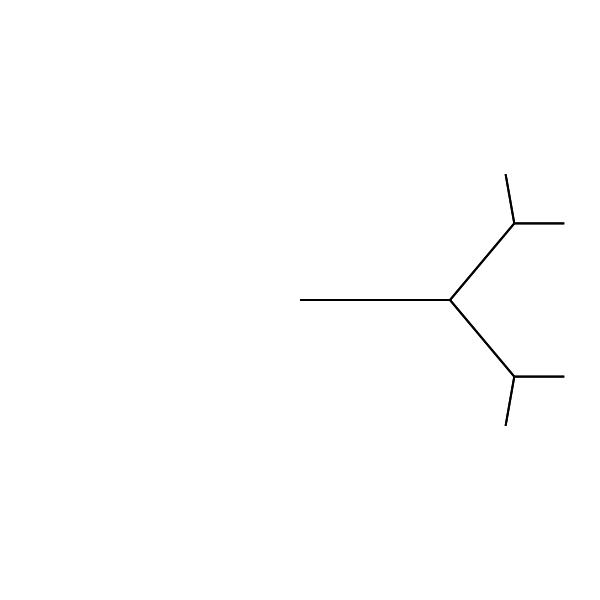

In [81]:
using ThinkJulia

function desenhar(t, comprimento, n)
    if n == 0
        return
    end
    
    ângulo = 50
    
    forward(t, comprimento * n)
    turn(t, -ângulo)
    desenhar(t, comprimento, n - 1)
    
    turn(t, 2 * ângulo)
    desenhar(t, comprimento, n - 1)
    turn(t, -ângulo)
    
    forward(t, -comprimento * n)
end

t = Turtle()

@svg begin
    desenhar(t, 50, 3)
end

### Exercício 5.7

![Uma curva de Koch de Tartaruga](../docs/img/koch-curve.png)

A curva de Koch é um fractal parecido com a figura acima. Para desenhar uma curva de Koch de comprimento $x$, você precisa seguir os seguintes passos:

1. Desenhar uma curva de Koch de comprimento $\dfrac{x}{3}$.
2. Girar 60º à esquerda.
3. Desenhar uma curva de Koch de comprimento $\dfrac{x}{3}$.
4. Girar 120º à direita.
5. Desenhar uma curva de Koch de comprimento $\dfrac{x}{3}$.
6. Girar 60º à esquerda.
7. Desenhar uma curva de Koch de comprimento $\dfrac{x}{3}$.

Essas regras não se aplicam se $x < 3$. Nesse caso, você pode desenhar uma linha reta de comprimento $x$. Faça o seguinte:

1. Escreva uma função chamada `koch` que receba como parâmetro uma tartaruga `t` e um comprimento `c`, e use a tartaruga para desenhar uma curva de Koch com o comprimento dado.
2. Escreva uma função chamada `floco_de_neve` que desenhe três curvas de Koch, de forma que a saída seja parecida com um floco de neve.
3. As curvas de Koch podem ser representadas de várias maneiras. Veja [alguns exemplos](https://en.wikipedia.org/wiki/Koch_snowflake) e implemente pelo menos um dos seus favoritos.